# Lliurament tasca 6: Visualització gràfica d'un dataset

## Exercici 1

### Resumeix gràficament el data set ``DelayedFlights.csv``

Abans de continuar amb els requeriments de l'exercici iniciarem els mòduls que necessitarem i carregarem el dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('DelayedFlights.csv')

### Crea almenys una visualització per:

* **Una variable categòrica (UniqueCarrier)**

Una visualització interessant per a aquesta variable pot ser, per exemple, el número de vols per companyia aèria.

In [2]:
flights_per_carrier = df.value_counts(subset='UniqueCarrier')
flights_per_carrier.head()

UniqueCarrier
WN    377602
AA    191865
MQ    141920
UA    141426
OO    132433
dtype: int64

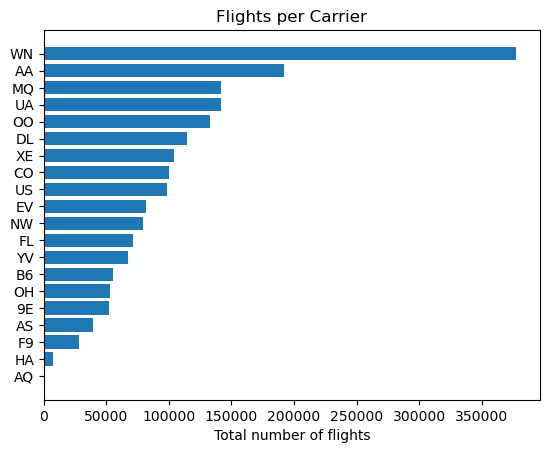

In [3]:
carriers = flights_per_carrier.index
flights = flights_per_carrier.values
    
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(carriers))
ax.barh(y_pos, flights, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(carriers)
ax.invert_yaxis()
ax.set_xlabel('Total number of flights')
ax.set_title('Flights per Carrier')

plt.savefig('carrier_flights.png')

plt.show()

* **Una variable numèrica (ArrDelay)**

Per a aquesta variable visualitzarem la duració mitja de retards cada mes.

In [4]:
avg_monthly_delay = df[['Month', 'ArrDelay']]
avg_monthly_delay = avg_monthly_delay.groupby('Month').mean()
avg_monthly_delay.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
avg_monthly_delay

,ArrDelay
Jan,42.801492
Feb,45.006123
Mar,41.914769
Apr,38.835305
May,37.593572
Jun,46.532728
Jul,45.995136
Aug,41.434409
Sep,35.168126
Oct,31.385769


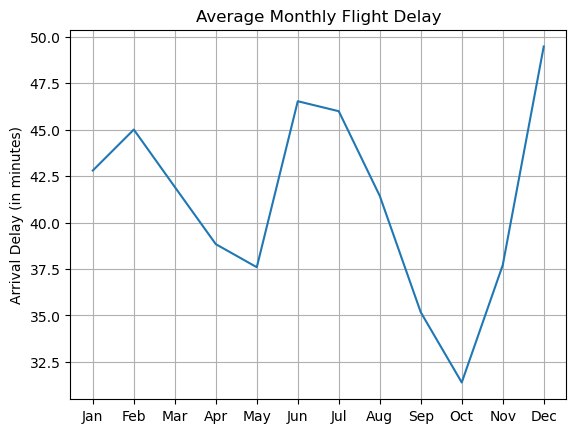

In [5]:
fig, ax = plt.subplots()
ax.plot(avg_monthly_delay)
ax.set(ylabel='Arrival Delay (in minutes)', title='Average Monthly Flight Delay')
ax.grid()

plt.savefig('monthly_delay.png')

plt.show()

* **Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)**

Visualitzarem si el retard mitjà per companyia aèria està relacionat amb el volum de vols.

In [6]:
avg_delay_per_carrier = df[['ArrDelay', 'UniqueCarrier']].copy()
avg_delay_per_carrier = avg_delay_per_carrier.groupby('UniqueCarrier').mean()

# Reorganitzem els indexos per a que coincideixin amb els dels vols totals
avg_delay_per_carrier = avg_delay_per_carrier.reindex(flights_per_carrier.index)
# Afegim una columna pels vols totals
avg_delay_per_carrier.loc[:,'TotalFlights'] = flights_per_carrier.values

avg_delay_per_carrier.head()

,ArrDelay,TotalFlights
UniqueCarrier,,
WN,30.087884,377602
AA,46.561553,191865
MQ,45.295058,141920
UA,47.784399,141426
OO,45.370587,132433


Un cop tenim la taula com la volem, farem la gràfica amb dos axis y.

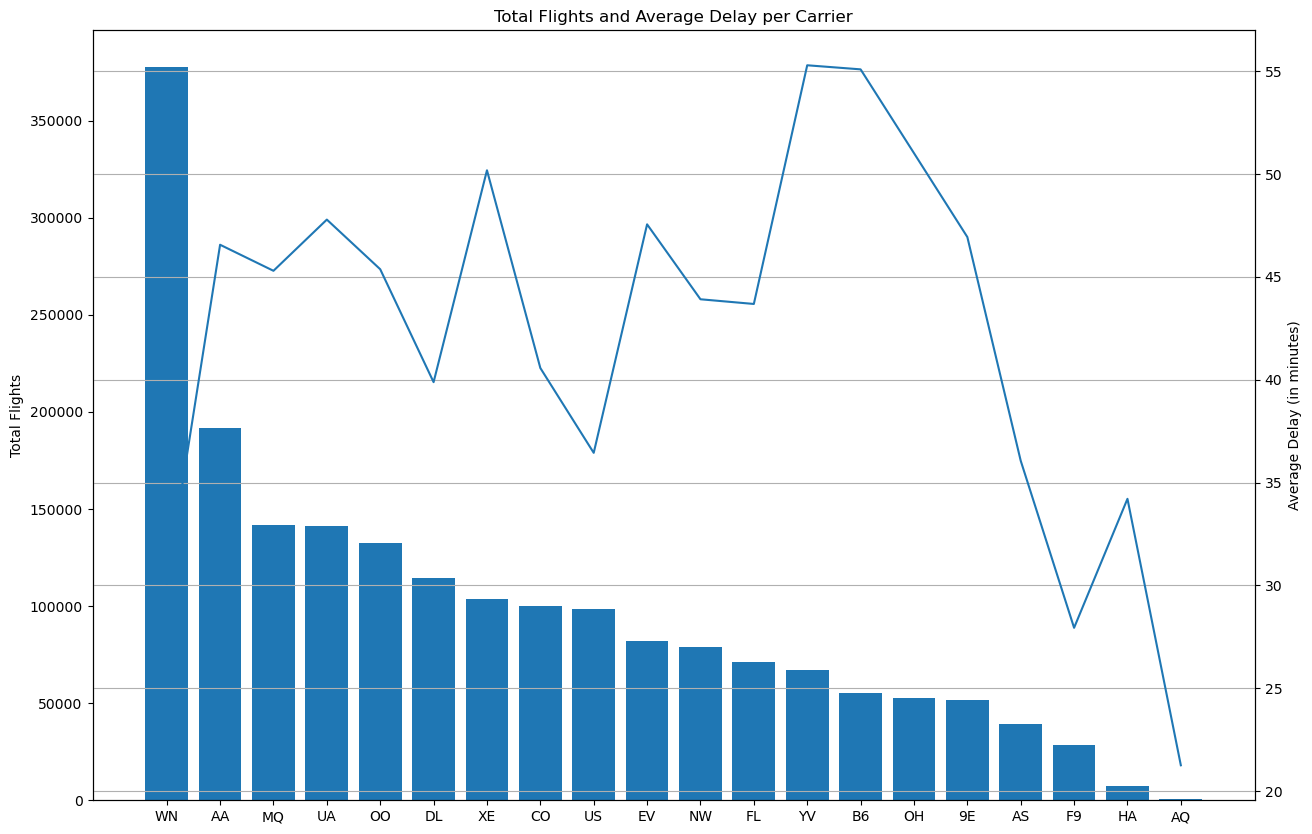

In [7]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
ax1.bar(avg_delay_per_carrier.index, avg_delay_per_carrier['TotalFlights'])
ax2.plot(avg_delay_per_carrier.index, avg_delay_per_carrier['ArrDelay'])
ax2.grid()
ax1.set(ylabel='Total Flights', title='Total Flights and Average Delay per Carrier')
ax2.set_ylabel('Average Delay (in minutes)')
plt.savefig('flights_delay_carrier.png')
plt.show()

* **Dues variables numèriques (ArrDelay i DepDelay)**

Per a aquesta visualització farem un diagrama de dispersió. Utilitzarem Seaborn per variar una mica.

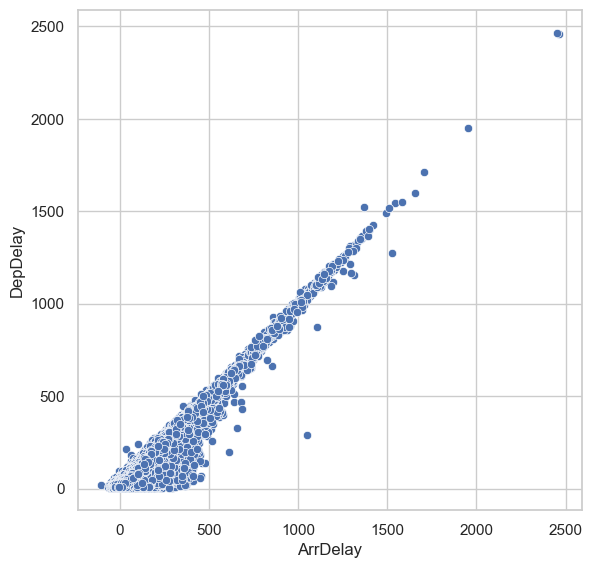

In [8]:
arrival_departure_correlation = df[['ArrDelay', 'DepDelay']]
sns.set_theme(style="whitegrid")
f, ax_corr = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="ArrDelay", y="DepDelay",
                data=arrival_departure_correlation, ax=ax_corr)
plt.savefig('delay_scatter.png')
plt.show()

Com era d'esperar, hi ha una clara correlació positiva entre el retard de sortida i el d'arribada.

* **Tres variables (ArrDelay, DepDelay i UniqueCarrier)**

Veurem quines companyies són més propenses a "arreglar" un retard de sortida.

In [9]:
df['DelayDiff'] = df['ArrDelay'] - df['DepDelay']
df[['UniqueCarrier', 'DepDelay', 'DelayDiff', 'ArrDelay']].head()

,UniqueCarrier,DepDelay,DelayDiff,ArrDelay
0,WN,8.0,-22.0,-14.0
1,WN,19.0,-17.0,2.0
2,WN,8.0,6.0,14.0
3,WN,34.0,0.0,34.0
4,WN,25.0,-14.0,11.0


Podem observar que, tenint en compte que ``ArrDelay`` és el retard total del vol, hi han observacions en les que la diferència entre aquest i ``DepDelay`` (a la que anomenem ``DelayDiff``) és negativa. Això vol dir que hi ha vols que, tot i haver sortit amb retard, han corregit aquest retard, de vegades fins i tot arribant abans de l'hora prevista (com veiem en l'observació a l'índex 0).

Ara visualitzarem quines companyies solen tenir millor ``DelayDiff``, on un nombre menor vol dir menys retard d'arrivada tenint en compte el de sortida.

In [10]:
carrier_delay_fix = df[['UniqueCarrier', 'DelayDiff']].copy()
carrier_delay_fix = carrier_delay_fix.groupby('UniqueCarrier').mean()
carrier_delay_fix.head()

,DelayDiff
UniqueCarrier,
9E,-0.414202
AA,0.166010
AQ,-4.768817
AS,-1.914894
B6,0.153446


Ja veiem que hi ha algunes companyes amb una diferència mitjana negativa. Qui ho havia de dir?

A continuació canviarem l'ordre de l'índex per a que es correspongui amb el que hem estat fent servir fins ara (de més volum de vols a menys).

In [11]:
carrier_delay_fix = carrier_delay_fix.reindex(flights_per_carrier.index)
carrier_delay_fix.head()

,DelayDiff
UniqueCarrier,
WN,-4.500687
AA,0.166010
MQ,1.692989
UA,-2.119443
OO,0.671855


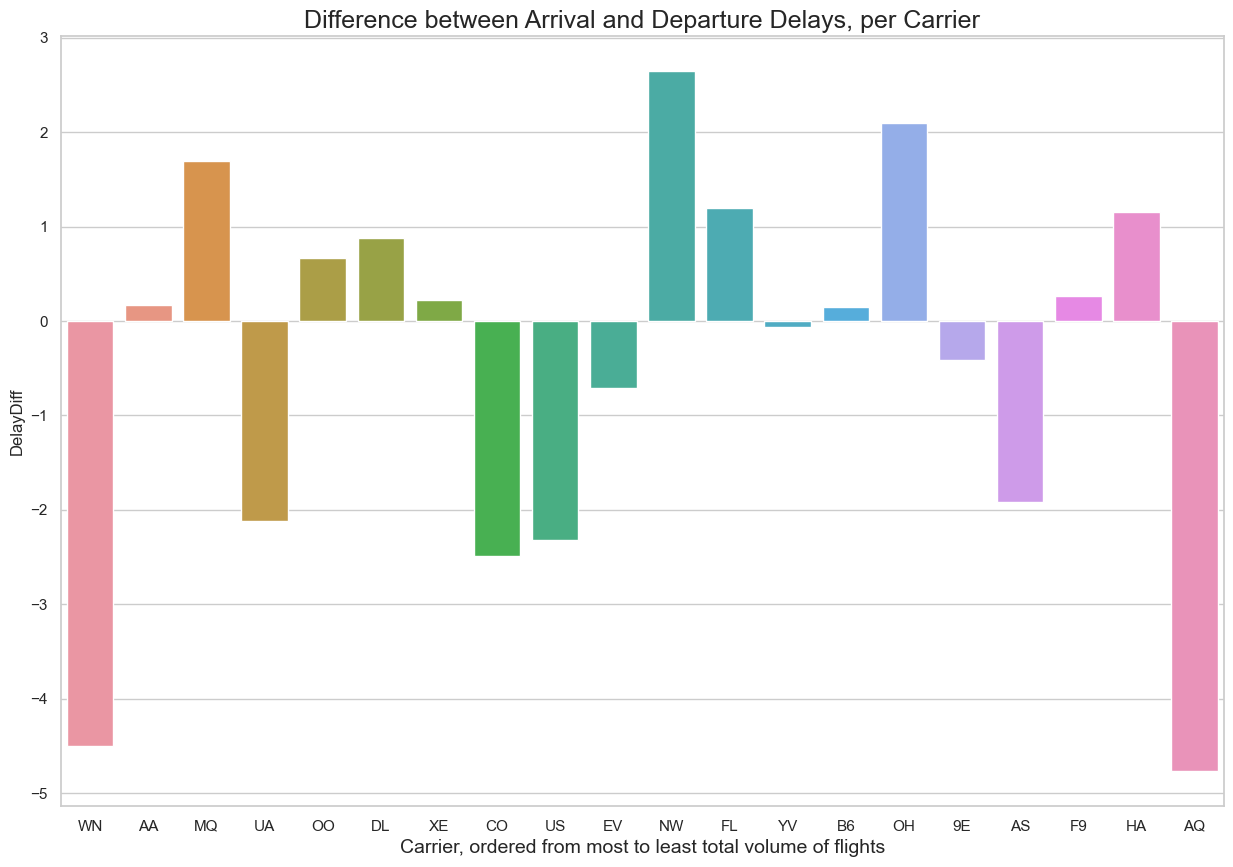

In [12]:
f, ax_fix = plt.subplots(figsize=(15,10))
sns.barplot(x=carrier_delay_fix.index, y='DelayDiff', data=carrier_delay_fix, ax=ax_fix)
ax_fix.set_title('Difference between Arrival and Departure Delays, per Carrier', fontsize=18)
ax_fix.set_xlabel('Carrier, ordered from most to least total volume of flights', fontsize=14)
plt.savefig('delay_diff_carriers.png')
plt.show()

Sorprenentment, les dues aerolínies més propenses a corregir un retard són la primera i la última en volum de vols! A continuació intentarem buscar possibles raons.

* **Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).**

Veurem si la diferència de retards pot tenir a veure amb la duració dels vols. En primer lloc, farem una taula de dispersió.

In [13]:
delays_airtime = df[['UniqueCarrier', 'ArrDelay', 'DepDelay', 'DelayDiff', 'AirTime']]
delays_airtime.head()

,UniqueCarrier,ArrDelay,DepDelay,DelayDiff,AirTime
0,WN,-14.0,8.0,-22.0,116.0
1,WN,2.0,19.0,-17.0,113.0
2,WN,14.0,8.0,6.0,76.0
3,WN,34.0,34.0,0.0,77.0
4,WN,11.0,25.0,-14.0,87.0


<ipython-input-14-0a26712d3e72>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


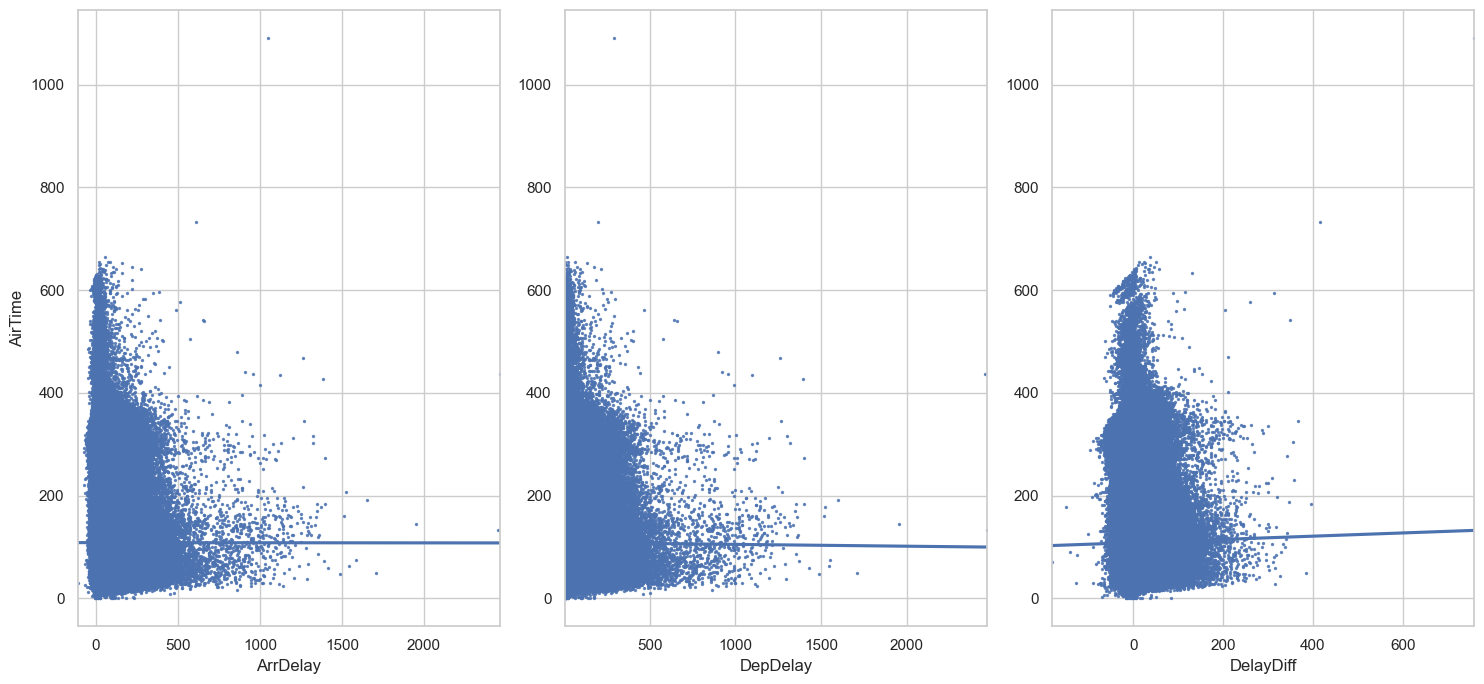

In [14]:
f, ax_del = plt.subplots(1, 3, figsize=(15,7))
dotsize = {'s': 2}
sns.regplot(x='ArrDelay', y='AirTime', data=delays_airtime, ax=ax_del[0], ci=None, scatter_kws=dotsize)
sns.regplot(x='DepDelay', y='AirTime', data=delays_airtime, ax=ax_del[1], ci=None, scatter_kws=dotsize)
sns.regplot(x='DelayDiff', y='AirTime', data=delays_airtime, ax=ax_del[2], ci=None, scatter_kws=dotsize)
ax_del[1].set(ylabel=None)
ax_del[2].set(ylabel=None)
f.tight_layout()
f.show()

En cap cas sembla estar la duració dels vols relacionada amb els retards.

In [15]:
delays_airtime_means = delays_airtime.copy()
delays_airtime_means.loc[:,'Month'] = df.loc[:,"Month"]
delays_airtime_means = delays_airtime_means.groupby('Month').mean()
delays_airtime_means.index = avg_monthly_delay.index
delays_airtime_means.head()

,ArrDelay,DepDelay,DelayDiff,AirTime
Jan,42.801492,43.545680,-0.674182,107.264801
Feb,45.006123,44.988440,0.131579,106.624769
Mar,41.914769,42.885223,-0.880559,108.739841
Apr,38.835305,39.864115,-0.958619,108.676411
May,37.593572,39.041575,-1.406238,109.344612


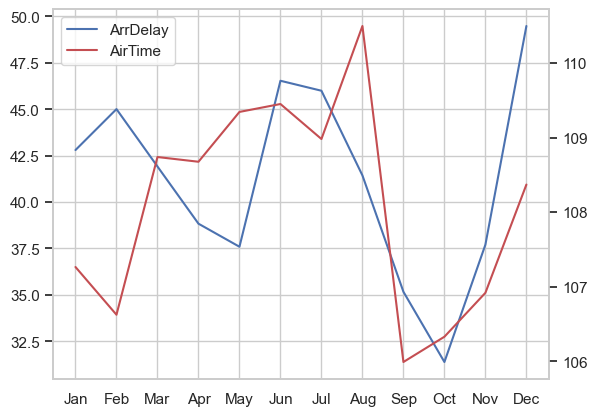

In [16]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
line1 = ax1.plot(delays_airtime_means.index, delays_airtime_means['ArrDelay'], '-', label='ArrDelay')
line2 = ax2.plot(delays_airtime_means.index, delays_airtime_means['AirTime'], '-r', label='AirTime')
lines = line1 + line2
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels)
ax2.grid()
plt.show()

I tampoc podem observar prou similitud com per suggerir que que la duració dels vols i el retard tenen un mateix patró durant l'any.

## Exercici 2

**Exporta els gràfics com imatges o com html**

La majoria dels gràfics han sigut guardats en la línia anterior a ``.show()`` a mesura que anàven sent programats.

## Exercici 3

**Exporta el data set net i amb les noves columnes a Excel.**

Exportarem el dataset de les mitjanes mensuals.

In [17]:
delays_airtime_means.to_csv('monthly_means_delay.csv')

## Exercici 4

**Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 3.**

En aquesta mateixa entrega quedarà adjuntada la llibreta de la tasca 5 amb les visualitzacions adjuntades.